# 학습 목표
##### 레이블링된 텍스트 데이터를 시각화하는 방법을 배운다.
##### 작은 데이터셋을 직접 만들어서 전체 과정을 체험해 본다.

### 사전지식
##### 이 데이터 세트에는 160만 개의 트윗이 있으며, 어느 열에도 누락된 값이 없습니다.
##### 각 트윗에는 대상 감정(부정적은 0, 중립은 2, 긍정적은 4), ID, 타임스탬프, 플래그(쿼리 또는 'NO_QUERY'), 사용자 이름 및 텍스트가 있습니다.
##### 감정 대상은 긍정적 라벨과 부정적 라벨의 수가 같아 균형을 이룹니다.

### 기능요구사항
##### Jupyter notebook에 프로세스 과정을 출력하고 결과 그래프도 출력하세요.
##### Positive Sentiment, Negative Sentiment에 각각 해당하는 단어들을 모아서 word cloud를 화면에 표시하세요.
##### Word Cloud를 만들 때 사용할 단어들은 sampling을 통해서 선택하세요.
##### 하나의 word cloud에는 최대 200개의 단어만 표시하세요.

# 프로그래밍 요구사항
##### pandas 라이브러리를 사용하세요
##### matplotlib 라이브러리를 사용하세요
##### wordcloud 라이브러리를 사용하세요
##### 2개의 word cloud는 하나의 plot에 그리세요.

In [1]:
#라이브러리 import 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#csv파일 읽고 컬럼명 설정
df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
#데이터 샘플링을 통해 긍정/부정 트윗 선택(각 10,000개씩)
positive_sample = df[df['target'] == 4].sample(10000, random_state=1)
negative_sample = df[df['target'] == 0].sample(10000, random_state=1)
positive_sample.head()

,target,id,date,flag,user,text
1470935,4,2065120693,Sun Jun 07 07:56:20 PDT 2009,NO_QUERY,FranQuintanilla,@miaakoch good luck in the concert
1449589,4,2062854559,Sun Jun 07 00:31:28 PDT 2009,NO_QUERY,superxleyley,will play JL. Be right back.
802028,4,1468164662,Tue Apr 07 00:04:05 PDT 2009,NO_QUERY,muserine,@chr15t14n thanks.
1469856,4,2064955151,Sun Jun 07 07:33:57 PDT 2009,NO_QUERY,onemanrock,@bekasaur thank you so much!!! nice to meet you!
1258897,4,1998007153,Mon Jun 01 17:50:10 PDT 2009,NO_QUERY,MammaSteph,@RickGershman Totally relate - my mom's a lone...


In [4]:
# 샘플링된 텍스트 합치기
# 워드 클라우드는 하나의 긴 문자열을 전달받고 단어의 빈도를 계산하여 시각화
positive_text = " ".join(positive_sample['text'].astype(str).tolist())
negative_text = " ".join(negative_sample['text'].astype(str).tolist())
print(positive_text)

@miaakoch good luck in the concert  will play JL. Be right back.  @chr15t14n  thanks. @bekasaur thank you so much!!!  nice to meet you! @RickGershman Totally relate - my mom's a lonely only, so we kids are helping her out with our &quot;nonno&quot;. See? U need to make some kids!  calling it a night...  17 pages so far. it's gonna be a looooooong night tomorrow.  goodnight  There is a Beatles rock band coming out!?!?!  finally ordered some prospectuses.  @singswell Thanks buddy  @mhwendy We went shopping in both places...  How was the concert? @anexemines If u do find someone... Let me know.  @maliciousmandy1 exaxtly what I said as if they'd try and get it away from her then  @TinaGray24 &quot;If ya wanna move than move!&quot;-Mims *singin* &quot;Move if ya wanna if ya wanna if ya wanna move!&quot; It's really that simple. Lol!  and we now have all of freaks and geeks  @kewiki A quik hello/goodmorning to you..have a great Monday!  @weak sweet! I hope our hours of work helped in some wa

In [5]:
# 워드 클라우드 생성 함수
# generate() - 단어 별 출현 빈도수를 비율로 반환하는 객체 생성
# 최대 단어 수는 200개
def generate_wordcloud(text, title, max_words=200):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") #눈금 삭제
    plt.title(title, fontsize=18)
    return wordcloud

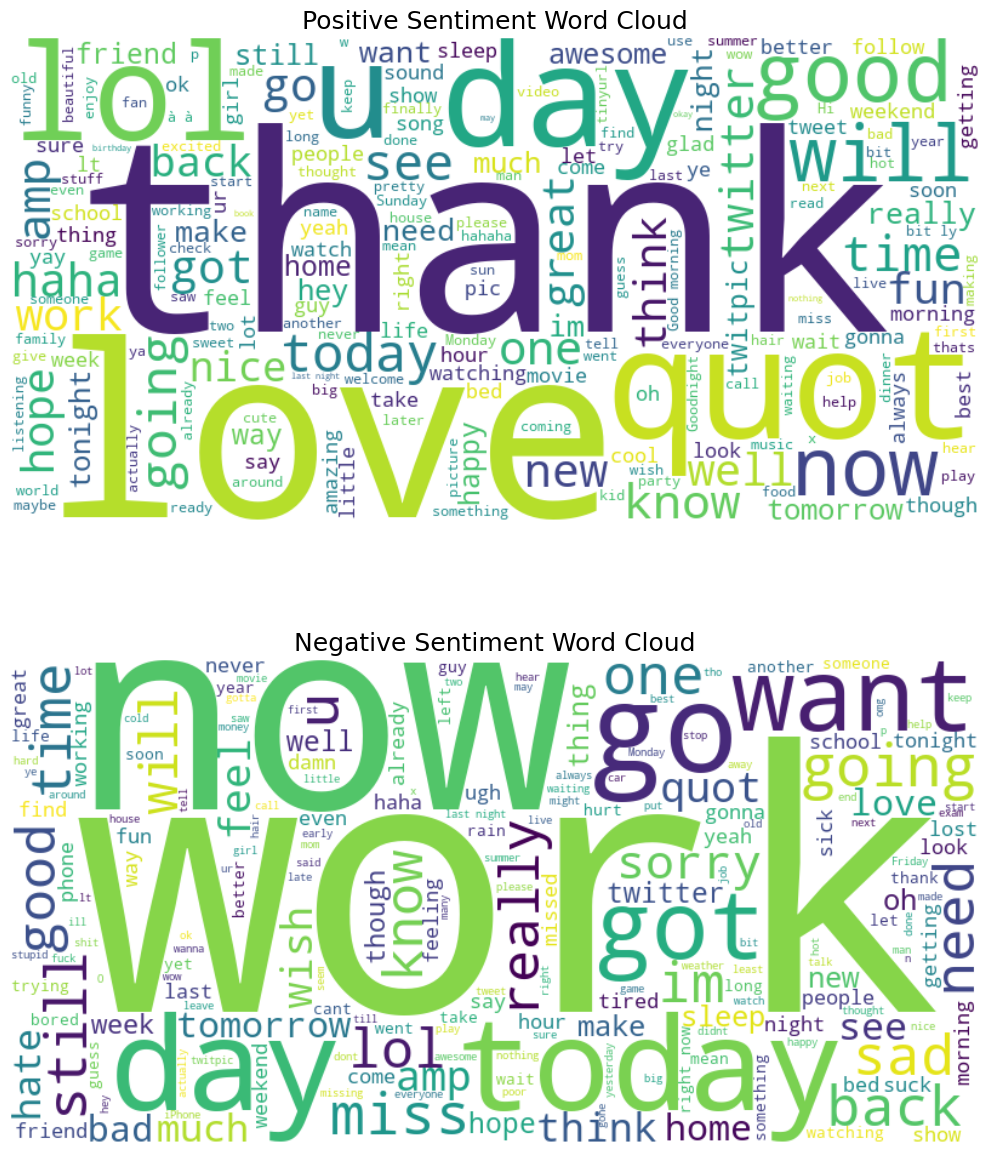

In [6]:
# 위/아래 레이아웃으로 출력
plt.figure(figsize=(10, 13)) 

# 긍정 워드 클라우드 
plt.subplot(2, 1, 1)
generate_wordcloud(positive_text, "Positive Sentiment Word Cloud")

# 부정 워드 클라우드
plt.subplot(2, 1, 2)
generate_wordcloud(negative_text, "Negative Sentiment Word Cloud")

plt.tight_layout()
plt.show()

# 팀 활동 요구사항
##### 제공된 데이터셋과 유사한 데이터셋을 웹 스크레이핑을 통해 만든 다음, word cloud를 만들어 봅시다.
##### 데이터셋을 만들 때 어떤 작업들이 추가적으로 필요할까요?
##### prototyping에는 최소 1,000개 이상의 데이터를 사용하세요.
##### 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있을지에 대해 토의합시다.

# 크롤링한 데이터셋
- 블라인드의 현대자동차 기업 리뷰
- 가져온 데이터 컬럼
    - rating: 회사에 대한 별점(1~5점)
    - title: 리뷰의 제목
    - status: 재직 상태
    - info: 닉네임, 직무, 작성 날짜(파싱없이 비정형)

# 데이터셋 생성 과정
- 리뷰 1~40p의 약 1200개 데이터를 크롤링
- 크롤링한 데이터는 json파일로 임시저장
- 별점 3점 미만/ 3점 초과로 긍정평가/ 부정평가를 분리하여 워드클라우드를 그린다. 
- 추가적인 작업: 유의미한 결과를 위해 title에 불용어 처리, 키워드 정제 등이 필요

# 비즈니스 가치
- 현직원 또는 정직원이 회사에 대해 갖고있는 긍정/부정적인 키워드들을 시각화
- 임직원들은 직원들의 니즈를 파악하고 복지를 향상
- 입사희망자들은 회사의 장, 단점을 파악

In [7]:
#라이브러리 import
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Extract

In [8]:
# HTTP 요청 헤더 설정
headers = {
       "User-Agent": (
           "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
           "AppleWebKit/537.36 (KHTML, like Gecko) "
           "Chrome/109.0.0.0 Safari/537.36"
       )
   }

In [9]:
# 특정 페이지의 모든 리뷰 데이터를 가져오는 함수
def fetch_reviews(page):
    reviews = []
    url = f"https://www.teamblind.com/kr/company/현대자동차/reviews?page={page}"
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to fetch page {page}: {response.status_code}") #페이지 fetch 실패
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    review_all = soup.select_one('.review_all')
    if not review_all:
        print(f"No reviews found on page {page}. Stopping iteration.") #해당 페이지에 리뷰가 없음
        return []
            
    review_items = review_all.select('.review_item_inr')
    for item in review_items:
        rating = float(item.select_one('.rating .num').get_text(strip=True).replace("Rating Score", "")) if item.select_one('.rating .num') else None
        title = item.select_one('.rvtit').get_text(strip=True).replace("\"", "") if item.select_one('.rvtit') else None
        status = item.select_one('.auth strong.vrf').get_text(strip=True).replace("Verified User", "") if item.select_one('.auth strong.vrf') else "Unverified"
        info = item.select_one('.auth').get_text(strip=True).replace(status, "").strip() if item.select_one('.auth') else None

        reviews.append({
            "rating": rating,
            "title": title,
            "status": status,
            "info": info,
        })
    
    print(f"Fetched {len(reviews)} reviews from page {page}.")
    return reviews

In [10]:
# 1~40페이지 리뷰 수집 및 저장
def scrape_reviews():
    all_reviews = []
    for page in range(1, 40):
        reviews = fetch_reviews(page)
        if not reviews:
            break  # 리뷰가 없으면 종료
        all_reviews.extend(reviews)
    print(f"총 {len(all_reviews)}개의 리뷰를 가져왔습니다.")
    return all_reviews

In [11]:
all_reviews = scrape_reviews() #Extract

Fetched 30 reviews from page 1.
Fetched 30 reviews from page 2.
Fetched 30 reviews from page 3.
Fetched 30 reviews from page 4.
Fetched 30 reviews from page 5.
Fetched 30 reviews from page 6.
Fetched 30 reviews from page 7.
Fetched 30 reviews from page 8.
Fetched 30 reviews from page 9.
Fetched 30 reviews from page 10.
Fetched 30 reviews from page 11.
Fetched 30 reviews from page 12.
Fetched 30 reviews from page 13.
Fetched 30 reviews from page 14.
Fetched 30 reviews from page 15.
Fetched 30 reviews from page 16.
Fetched 30 reviews from page 17.
Fetched 30 reviews from page 18.
Fetched 30 reviews from page 19.
Fetched 30 reviews from page 20.
Fetched 30 reviews from page 21.
Fetched 30 reviews from page 22.
Fetched 30 reviews from page 23.
Fetched 30 reviews from page 24.
Fetched 30 reviews from page 25.
Fetched 30 reviews from page 26.
Fetched 30 reviews from page 27.
Fetched 30 reviews from page 28.
Fetched 30 reviews from page 29.
Fetched 30 reviews from page 30.
Fetched 30 reviews 

In [12]:
# DataFrame 생성 및 json 저장
df = pd.DataFrame(all_reviews)
df.to_json('hyundai_reviews.json', force_ascii=False, orient = 'records', indent=4)
print("리뷰 데이터를 json 파일로 저장했습니다.")

df.head()

리뷰 데이터를 json 파일로 저장했습니다.


,rating,title,status,info
0,1.0,"“연봉 속이는 최악의 회사(신입4천대/대리5천대), 7년째 매년 하락중”",현직원,Verified User· 현********* · 구매·물류·SCM 전문가 - 20...
1,1.0,“인재 멸시의 현대자동차”,현직원,Verified User· I********* · 연구개발(R&D) - 2020.0...
2,1.0,“진실된 리뷰는 '추천수'로 확인하세요”,현직원,Verified User· 이******** · 연구개발(R&D) - 2023.08.11
3,2.0,"“미래가없는 회사, 꿀빠는게 답이다라고 강요하는 회사”",현직원,Verified User· l********* · 연구개발(R&D) - 2020.0...
4,1.0,“회사가 잘나가도 입사후부터 연봉이 수직하강함”,현직원,Verified User· l******** · 연구개발(R&D) - 2020.10.05


## WordCloud

In [13]:
# 데이터가 한글 - 시스템에 맞는 폰트 설정
font_path = "/Library/Fonts/AppleGothic.ttf"

In [14]:
# 클라우드 생성 함수
# font_path 추가
def generate_wordcloud(text, title, max_words=200):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words, font_path=font_path).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") #눈금 삭제
    plt.title(title, fontsize=18)
    return wordcloud

In [15]:
# 3점을 기준으로 긍정/부정 리뷰를 나눔
positive_review = df[df['rating'] > 3]
negative_review = df[df['rating'] < 3]
positive_review

,rating,title,status,info
167,5.0,“기계과한테 더 좋은 직장이 있나”,Unverified,Verified User전직원· E**** · 연구개발(R&D) - 2020.08.20
168,4.0,“커리어향상과 전문성향상 Good”,현직원,Verified User· J**** · 회계·세무·재무 전문가 - 2021.08.21
232,5.0,“최고임”,Unverified,Verified User전직원· w***** · 생산엔지니어·생산관리 - 2021....
283,4.0,“시급이 높은 회사”,현직원,Verified User· i******* · 경영지원·관리 전문가 - 2023.0...
358,4.0,“자동차를 좋아하는 사람에겐 최고의 직장”,현직원,Verified User· i********* · 연구개발(R&D) - 2020.0...
...,...,...,...,...
1165,5.0,“좋음”,현직원,Verified User· s***** · 연구개발(R&D) - 2021.01.04
1166,5.0,“연구손데 책임 전이라 그런지 워라벨은 미친회사”,현직원,Verified User· 킹******* · 연구개발(R&D) - 2020.12.29
1167,5.0,“여전히 탑 대기업”,현직원,Verified User· R***** · 경영지원·관리 전문가 - 2020.12.26
1168,5.0,“난 만족하며 다닌다”,현직원,Verified User· 달***** · 경영지원·관리 전문가 - 2020.12.19


In [16]:
# 텍스트 합치기 - 워드 클라우드는 하나의 긴 문자열을 전달받고 단어의 빈도를 계산하여 시각화
positive_review_title = " ".join(df['title'].astype(str).tolist())
negative_review_title = " ".join(df['title'].astype(str).tolist())

In [17]:
# 합친 텍스트에서 불용어 처리
# 불용어(stop word) - 분석에 큰 의미가 없는 단어
# 사용한 한국어 불용어 파일 - https://github.com/byungjooyoo/Dataset/blob/main/korean_stopwords.txt
import nltk
with open('data/korean_stopwords.txt', 'r') as f:
    stop_words = f.read().split("\n")
print(len(stop_words), stop_words[:10])

# 약간 비효율적인 코드
for word in stop_words:
    positive_review_title.replace(word, "")
    negative_review_title.replace(word, "")

675 ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


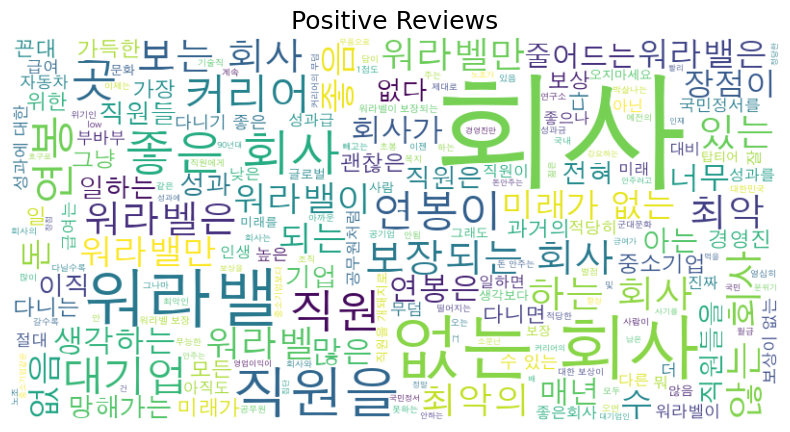

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(generate_wordcloud(positive_review_title, "Positive Reviews"), interpolation='bilinear')
plt.show()

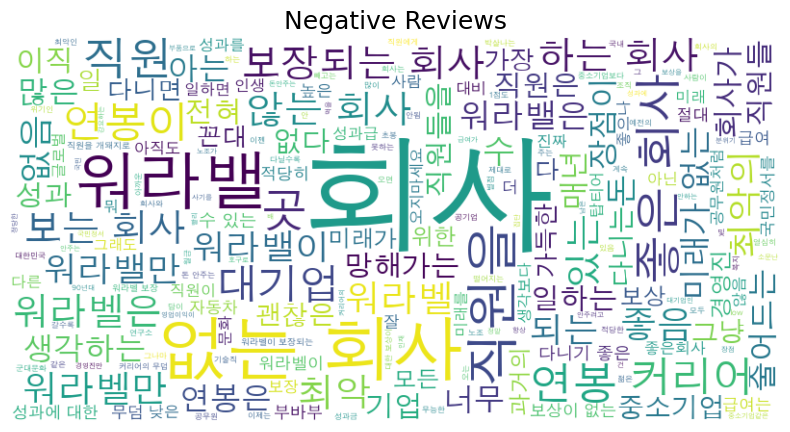

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(generate_wordcloud(negative_review_title, "Negative Reviews"), interpolation='bilinear')
plt.show()